In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def load_valid_data_preds(path):
    preds = pd.read_csv(path)
    return preds

In [3]:
df = load_valid_data_preds("/work/submit/josemm/WORKS/Theory/BANANNE/LABS/TRAIN_ALL/results/rmse_tables/valid_data_all_100.csv")

In [4]:
def get_metrics_eb(idf, bootstrap_n=1000, emax=8):
    metrics_per_n = {"mape": [], "mape_std": [], "rmse": [], "rmse_std": [], "N": []}
    for n in sorted(idf.N.unique()):
        df = idf.copy().query(f"emax == {emax}").query(f"N == {n}")
        preds =  df["eb_pred"]
        u_preds = df["eb_unc"]
        target = df["Energy ket"]
        mean_mape = mean_absolute_percentage_error(target, preds)
        mean_rmse = root_mean_squared_error(target, preds)
        # Bootstrap
        mape = []
        mse = []
        for i in range(bootstrap_n):
            i_preds = np.random.normal(preds, u_preds)
            mape.append(mean_absolute_percentage_error(target, i_preds))
            mse.append(root_mean_squared_error(target, i_preds))
        mape = np.array(mape)
        rmse = np.array(mse)
        metrics_per_n["mape"].append(mean_mape)
        metrics_per_n["mape_std"].append(mape.std())
        metrics_per_n["rmse"].append(mean_rmse)
        metrics_per_n["rmse_std"].append(rmse.std())
        metrics_per_n["N"].append(n)
    return pd.DataFrame(metrics_per_n)

In [5]:
def get_metrics_rc(idf, bootstrap_n=1000, emax=8):
    metrics_per_n = {"mape": [], "mape_std": [], "rmse": [], "rmse_std": [], "N": []}
    for n in sorted(idf.N.unique()):
        df = idf.copy().query(f"emax == {emax}").query(f"N == {n}")
        preds =  df["r_pred"]
        u_preds = df["r_unc"]
        target = df["Rch"]
        mean_mape = mean_absolute_percentage_error(target, preds)
        mean_rmse = root_mean_squared_error(target, preds)
        # Bootstrap
        mape = []
        mse = []
        for i in range(bootstrap_n):
            i_preds = np.random.normal(preds, u_preds)
            mape.append(mean_absolute_percentage_error(target, i_preds))
            mse.append(root_mean_squared_error(target, i_preds))
        mape = np.array(mape)
        rmse = np.array(mse)
        metrics_per_n["mape"].append(mean_mape)
        metrics_per_n["mape_std"].append(mape.std())
        metrics_per_n["rmse"].append(mean_rmse)
        metrics_per_n["rmse_std"].append(rmse.std())
        metrics_per_n["N"].append(n)
    return pd.DataFrame(metrics_per_n)

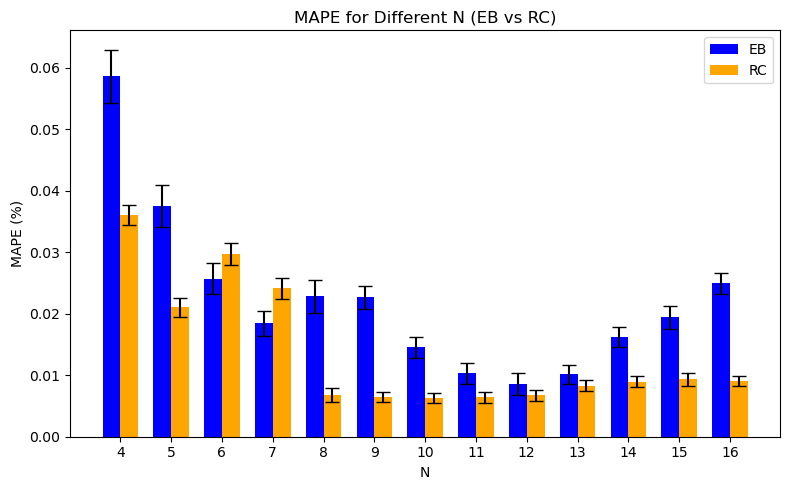

In [6]:
metrics_eb = get_metrics_eb(df)
metrics_rc = get_metrics_rc(df)

fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x = np.arange(len(metrics_eb['N']))

ax.bar(x - bar_width/2, metrics_eb['mape'], width=bar_width,
    yerr=metrics_eb['mape_std'], capsize=5, label='EB', color='blue')

ax.bar(x + bar_width/2, metrics_rc['mape'], width=bar_width,
    yerr=metrics_rc['mape_std'], capsize=5, label='RC', color='orange')

ax.set_xlabel('N')
ax.set_ylabel('MAPE (%)')
ax.set_title('MAPE for Different N (EB vs RC)')

ax.set_xticks(x)
ax.set_xticklabels(metrics_eb['N'])
ax.legend()

plt.tight_layout()
plt.show()